In [ ]:
#This code is comparing GDP and Life Expectancy, although I wonder about what James Baldwin said in 
#"The Crusade of Indignation": "[People] believe...that people will be made better as their economic state
# imroves. It is an extremely attractive theory, and most of us have at one time or another espoused it. 
# Only--in order to bring abou this economic utopia, one needs a band of people who do not care about money--
# or power--who will carry out the necessary operation of taking money from those who now have an abundance of 
# it and distributing it among those who have too little?"

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [253]:
#load the data
data = pd.read_csv('all_data.csv')
#inspect the data
print(data.head())
print(data.columns)
print(data.describe())
print(data['Year'].unique())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.06751

In [170]:
#Find the countries invovled
print(data['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [22]:
#Each country's data set 
chile = data[data['Country']=='Chile']
china = data[data['Country']=='China']
germany = data[data['Country']=='Germany']
mexico = data[data['Country']=='Mexico']
usa = data[data['Country']=='United States of America']
zimbabwe = data[data['Country']=='Zimbabwe']

In [20]:
#Chile's max, min, and mean life expencatancy
chile_max = chile['Life expectancy at birth (years)'].max()
chile_min = chile['Life expectancy at birth (years)'].min()
chile_mean = chile['Life expectancy at birth (years)'].mean()
print(chile_max, chile_min, chile_mean)

80.5 77.3 78.94374999999998


In [25]:
#China's max, min, and mean life expencatancy
china_max = china['Life expectancy at birth (years)'].max()
china_min = china['Life expectancy at birth (years)'].min()
china_mean = china['Life expectancy at birth (years)'].mean()
print(china_max, china_min, china_mean)

76.1 71.7 74.26249999999999


In [27]:
#Germany's max, min, and mean life expencatancy
germany_max = germany['Life expectancy at birth (years)'].max()
germany_min = germany['Life expectancy at birth (years)'].min()
germany_mean = germany['Life expectancy at birth (years)'].mean()
print(germany_max, germany_min, germany_mean)

81.0 78.0 79.65625


In [29]:
#Mexico's max, min, and mean life expencatancy
mexico_max = mexico['Life expectancy at birth (years)'].max()
mexico_min = mexico['Life expectancy at birth (years)'].min()
mexico_mean = mexico['Life expectancy at birth (years)'].mean()
print(mexico_max, mexico_min, mexico_mean)

76.7 74.8 75.71875


In [31]:
#USA's max, min, and mean life expencatancy
usa_max = usa['Life expectancy at birth (years)'].max()
usa_min = usa['Life expectancy at birth (years)'].min()
usa_mean = usa['Life expectancy at birth (years)'].mean()
print(usa_max, usa_min, usa_mean)

79.3 76.8 78.0625


In [34]:
#Zimbabwe's max, min, and mean life expencatancy
zimbabwe_max = zimbabwe['Life expectancy at birth (years)'].max()
zimbabwe_min = zimbabwe['Life expectancy at birth (years)'].min()
zimbabwe_mean = zimbabwe['Life expectancy at birth (years)'].mean()
print(zimbabwe_max, zimbabwe_min, zimbabwe_mean)

60.7 44.3 50.09375000000001


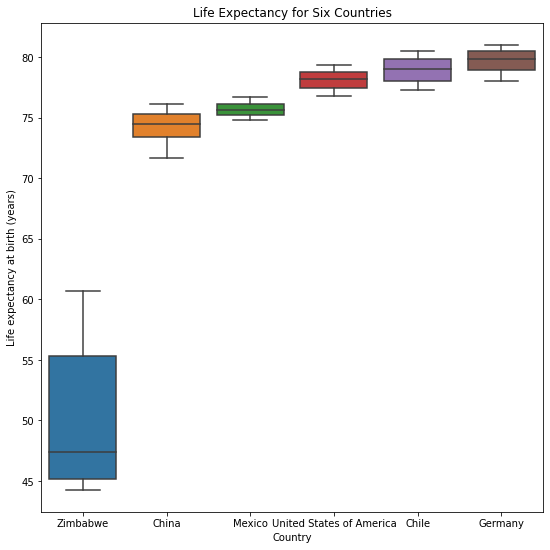

<Figure size 432x288 with 0 Axes>

In [240]:
#Comparing boxplots of Countries' life expecancy at birth
plt.figure(figsize=(9, 9))
sns.boxplot(x = data['Country'], y = data['Life expectancy at birth (years)'], 
            order =['Zimbabwe', 'China', 'Mexico', 'United States of America', 'Chile', 'Germany'])
plt.title('Life Expectancy for Six Countries')
plt.savefig('six_countries2.png')
plt.show()
plt.clf()



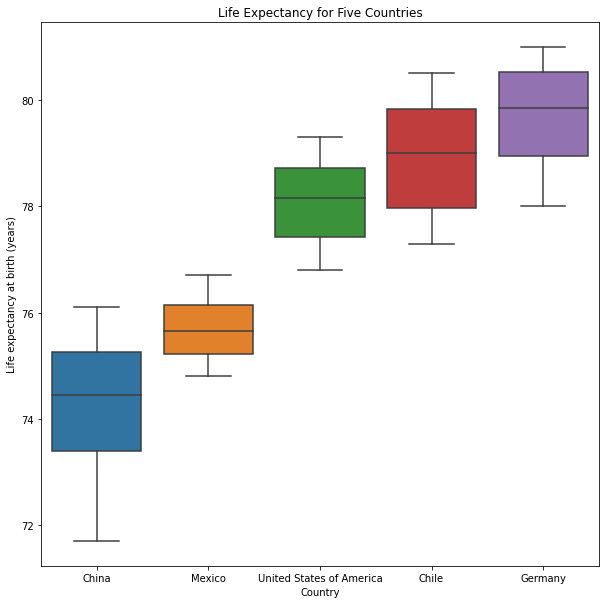

<Figure size 432x288 with 0 Axes>

In [263]:
#Comparing boxplots of Countries' life expecancy at birth minus Zimbabwe
minus_zimbawe = data[data['Country']!='Zimbabwe']
plt.figure(figsize=(10, 10))
sns.boxplot(x = minus_zimbawe['Country'], y = minus_zimbawe['Life expectancy at birth (years)'],
           order =['China', 'Mexico', 'United States of America', 'Chile', 'Germany'])
plt.title('Life Expectancy for Five Countries')
plt.show()
plt.clf()

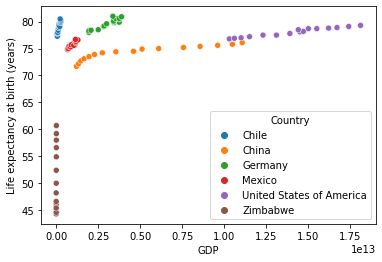

<Figure size 432x288 with 0 Axes>

In [52]:
#Scatterplot of the countries' life expecancy at birth related to GDP

sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', 
                hue = 'Country', data = data)
plt.show()
plt.clf()

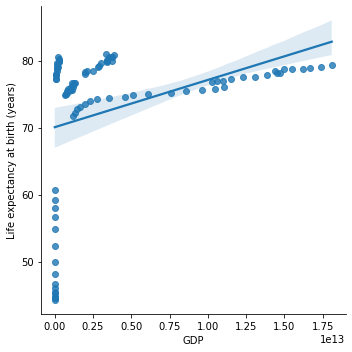

<Figure size 432x288 with 0 Axes>

In [169]:
sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = data)
plt.show()
plt.clf()

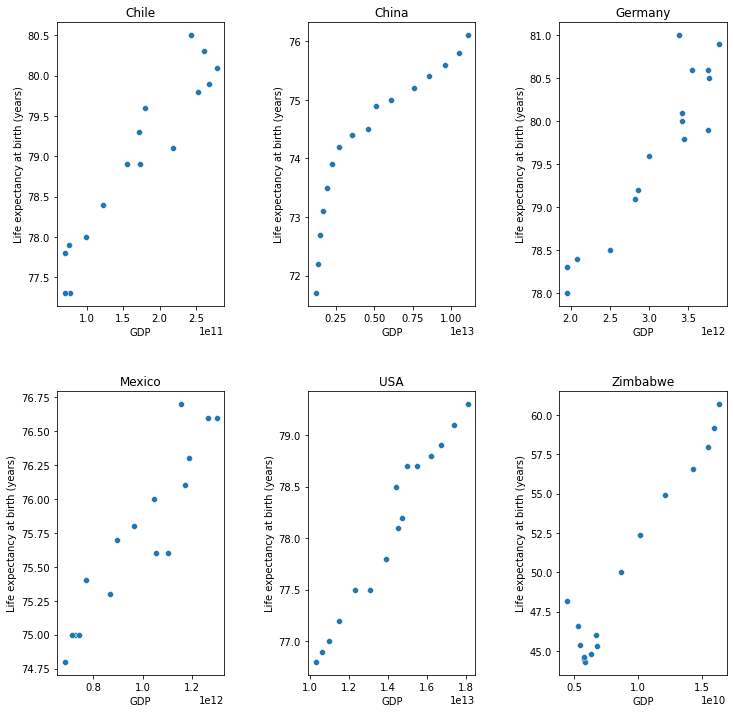

<Figure size 432x288 with 0 Axes>

In [241]:
gdp_min = data['GDP'].min()
gdp_max = data['GDP'].max()

plt.figure(figsize=(12, 12))
ax1 = plt.subplot(2,3,1)
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = chile)


ax2 = plt.subplot(2,3,2)
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = china)

ax3 = plt.subplot(2,3,3)
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = germany)

ax4 = plt.subplot(2,3,4)
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = mexico)

ax5 = plt.subplot(2,3,5)
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = usa)

ax6 = plt.subplot(2,3,6)
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = zimbabwe)


#ax2.sharey(ax1)
#ax3.sharey(ax1)
#ax4.sharey(ax1)
#ax5.sharey(ax1)
#ax6.sharey(ax1)

ax1.set_title('Chile')
ax2.set_title('China')
ax3.set_title('Germany')
ax4.set_title('Mexico')
ax5.set_title('USA')
ax6.set_title('Zimbabwe')
plt.subplots_adjust(wspace=0.5, hspace=.3)
plt.savefig('life_gdp.png')
plt.show()
plt.clf()

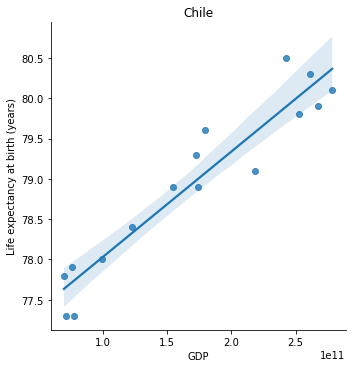

<Figure size 432x288 with 0 Axes>

In [181]:

sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = chile)
plt.title('Chile')
plt.show()
plt.clf()


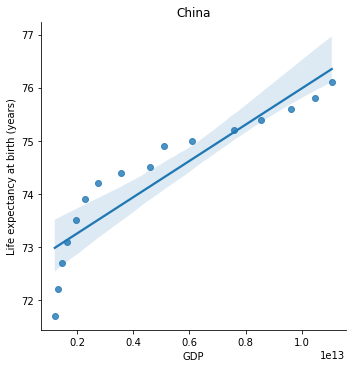

<Figure size 432x288 with 0 Axes>

In [182]:
sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = china)
plt.title('China')
plt.show()
plt.clf()

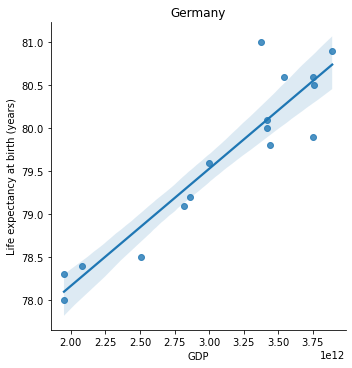

<Figure size 432x288 with 0 Axes>

In [183]:
sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = germany)
plt.title('Germany')
plt.show()
plt.clf()

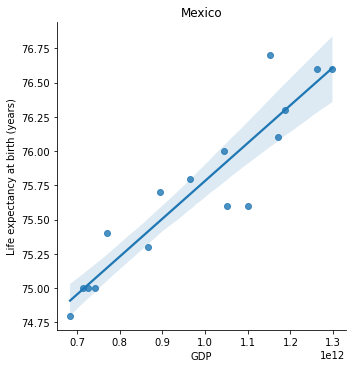

<Figure size 432x288 with 0 Axes>

In [184]:
sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = mexico)
plt.title('Mexico')
plt.show()
plt.clf()

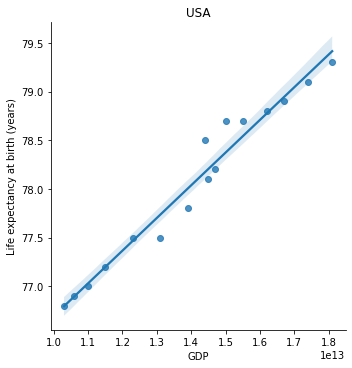

<Figure size 432x288 with 0 Axes>

In [185]:
sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = usa)
plt.title('USA')
plt.show()
plt.clf()

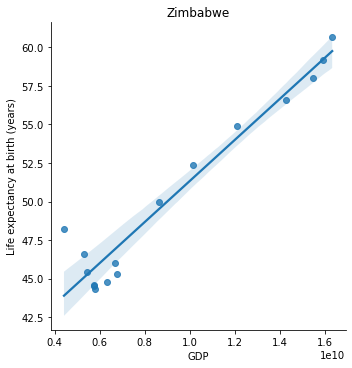

<Figure size 432x288 with 0 Axes>

In [186]:
sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = zimbabwe)
plt.title('Zimbabwe')
plt.show()
plt.clf()


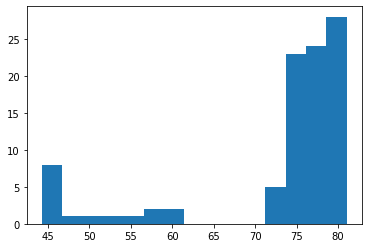

<Figure size 432x288 with 0 Axes>

In [199]:
plt.hist(x='Life expectancy at birth (years)', data=data, bins = 15)
plt.show()
plt.clf()

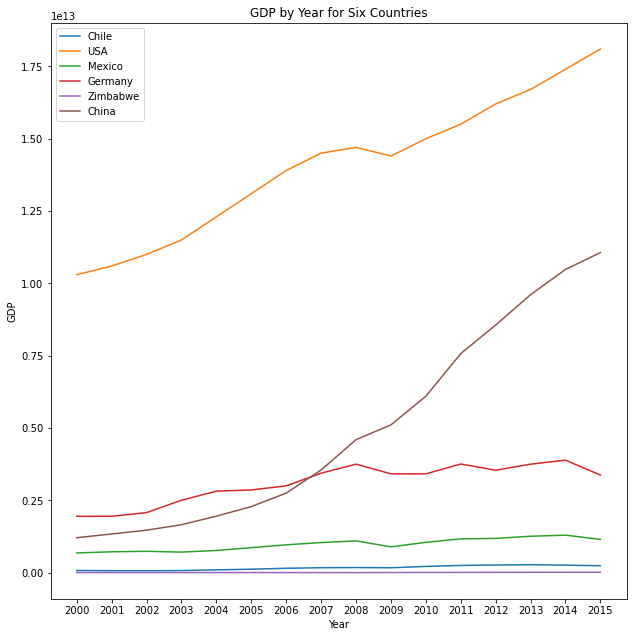

<Figure size 432x288 with 0 Axes>

In [268]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot('Year', 'GDP', data = chile)
plt.plot('Year', 'GDP', data = usa)
plt.plot('Year', 'GDP', data = mexico)
plt.plot('Year', 'GDP', data = germany)
plt.plot('Year', 'GDP', data = zimbabwe)
plt.plot('Year', 'GDP', data = china)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP by Year for Six Countries')
ax.set_xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
ax.set_xticklabels(data['Year'].unique())
plt.legend(['Chile', 'USA', 'Mexico', 'Germany', 'Zimbabwe', 'China'], loc=2)
plt.savefig('gdp_year.png')
plt.show()
plt.clf()

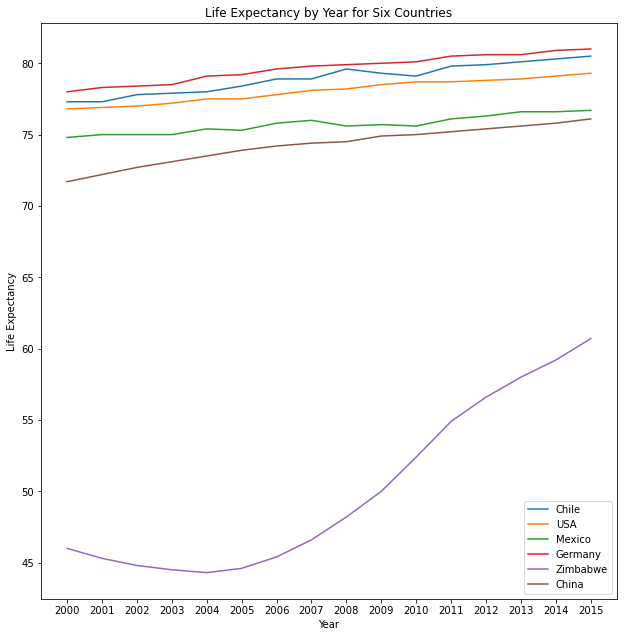

<Figure size 432x288 with 0 Axes>

In [269]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot('Year', 'Life expectancy at birth (years)', data = chile)
plt.plot('Year', 'Life expectancy at birth (years)', data = usa)
plt.plot('Year', 'Life expectancy at birth (years)', data = mexico)
plt.plot('Year', 'Life expectancy at birth (years)', data = germany)
plt.plot('Year', 'Life expectancy at birth (years)', data = zimbabwe)
plt.plot('Year', 'Life expectancy at birth (years)', data = china)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year for Six Countries')
plt.legend(['Chile', 'USA', 'Mexico', 'Germany', 'Zimbabwe', 'China'], loc=4)
ax.set_xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
ax.set_xticklabels(data['Year'].unique())
plt.savefig('life_year.png')
plt.show()
plt.clf()